In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('/Users/lishachouhdary/Music Cluster Analysis/spotify_data1.csv')
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [2]:
df.shape

(1686, 29)

In [3]:
print('Shape:', df.shape)
df.info()
df.head

Shape: (1686, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   obj

<bound method NDFrame.head of       energy    tempo  danceability playlist_genre  loudness  liveness  \
0      0.592  157.969         0.521            pop    -7.777    0.1220   
1      0.507  104.978         0.747            pop   -10.171    0.1170   
2      0.808  108.548         0.554            pop    -4.169    0.1590   
3      0.910  112.966         0.670            pop    -4.070    0.3040   
4      0.783  149.027         0.777            pop    -4.477    0.3550   
...      ...      ...           ...            ...       ...       ...   
1681   0.422  124.357         0.573          latin    -7.621    0.1020   
1682   0.725  105.016         0.711          latin    -8.315    0.1100   
1683   0.809   99.005         0.724          latin    -5.022    0.0765   
1684   0.642   83.389         0.463          latin    -4.474    0.0686   
1685   0.890  126.881         0.645            pop    -4.985    0.3760   

      valence               track_artist  time_signature  speechiness  ...  \
0  

In [4]:
df.isnull().sum()

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            1
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64

In [5]:
print('Duplicate rows:', df.duplicated().sum())

Duplicate rows: 0


In [6]:
df = pd.read_csv('spotify_data1.csv')

features = ['energy', 'valence', 'danceability', 'acousticness', 'instrumentalness', 'tempo']
df_clean = df[features].dropna().reset_index(drop = True)

In [7]:
#Normalizing features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_clean)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features)

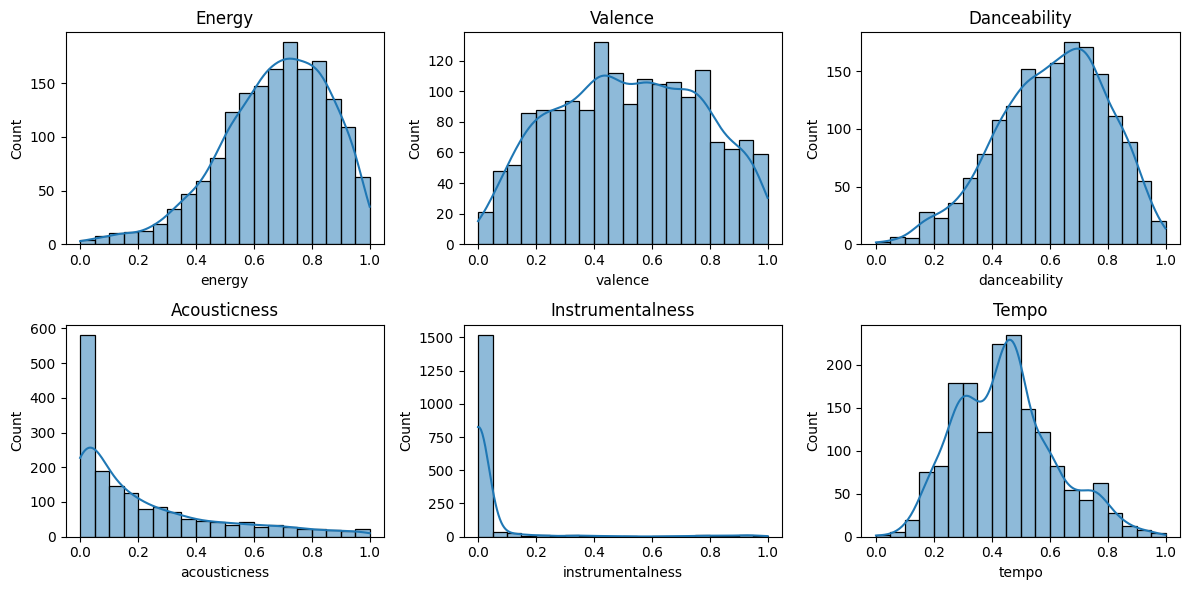

In [8]:
#Visualizing mood profiles
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_scaled[feature], bins=20, kde=True)
    plt.title(feature.capitalize())
plt.tight_layout()
plt.show()

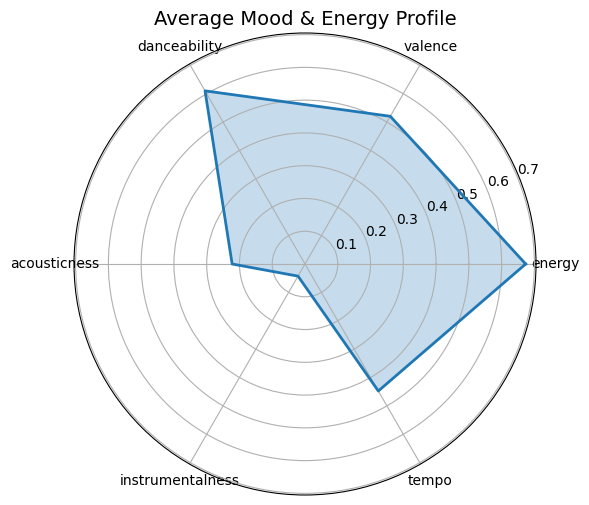

In [9]:
#Radar plot of averages
mean_profile = df_scaled.mean()

# Radar plot
labels = mean_profile.index.tolist()
stats = mean_profile.values

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, stats, linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Average Mood & Energy Profile", size=14)
plt.show()

In [10]:
# Clustering songs by mood and energy
from sklearn.cluster import KMeans

k = 4  

kmeans = KMeans(n_clusters=k, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

df_scaled['track_name'] = df['track_name']

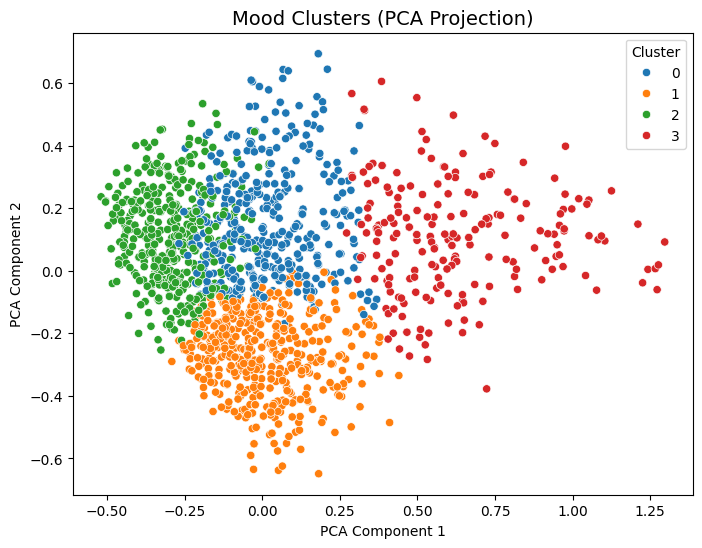

In [11]:
#Plotting a mood cluster
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled[features])

df_scaled['PCA1'] = components[:, 0]
df_scaled['PCA2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
plt.title("Mood Clusters (PCA Projection)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

In [12]:
# Average mood/energy profile per cluster
cluster_profile = df_scaled.groupby('cluster')[features].mean()
print(cluster_profile)

           energy   valence  danceability  acousticness  instrumentalness  \
cluster                                                                     
0        0.615619  0.573557      0.739758      0.286765          0.007413   
1        0.737925  0.325546      0.519769      0.079262          0.048151   
2        0.779275  0.783024      0.657957      0.096571          0.031387   
3        0.400118  0.293255      0.459737      0.713148          0.125810   

            tempo  
cluster            
0        0.359422  
1        0.500144  
2        0.483838  
3        0.417169  


In [13]:
#Selecting only the relevant features
cluster_summary = df_scaled.groupby('cluster')[['energy', 'valence', 'danceability', 'acousticness', 'instrumentalness', 'tempo']].mean()

#Round for readability
cluster_summary_rounded = cluster_summary.round(2)
print(cluster_summary_rounded)

         energy  valence  danceability  acousticness  instrumentalness  tempo
cluster                                                                      
0          0.62     0.57          0.74          0.29              0.01   0.36
1          0.74     0.33          0.52          0.08              0.05   0.50
2          0.78     0.78          0.66          0.10              0.03   0.48
3          0.40     0.29          0.46          0.71              0.13   0.42


In [14]:
#labelling each cluster
cluster_labels = {
    0: "Balanced / Versatile Mix",
    1: "Intense Hits",
    2: "Feel-Good Hits",
    3: "Chill & Acoustic"
}

df_scaled['cluster_label'] = df_scaled['cluster'].map(cluster_labels)

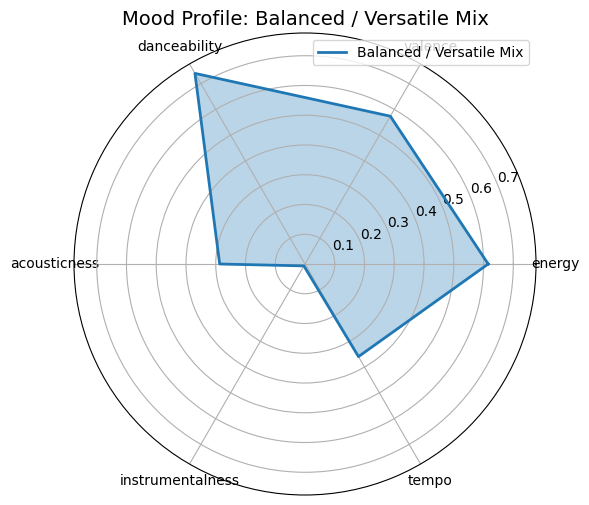

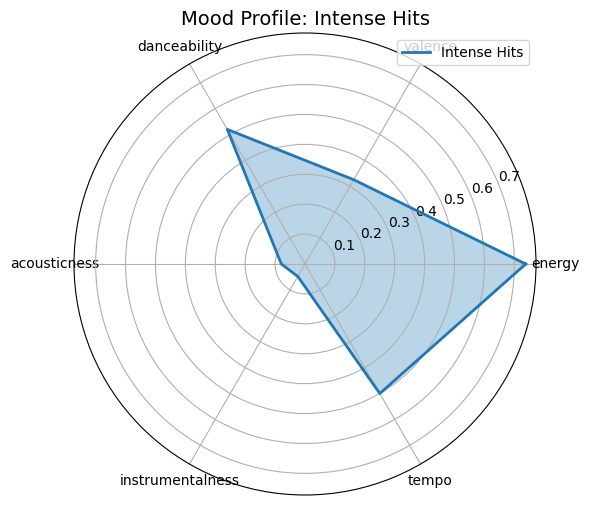

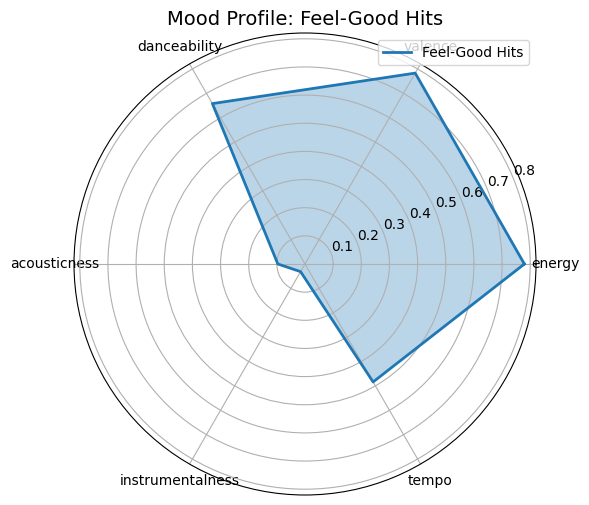

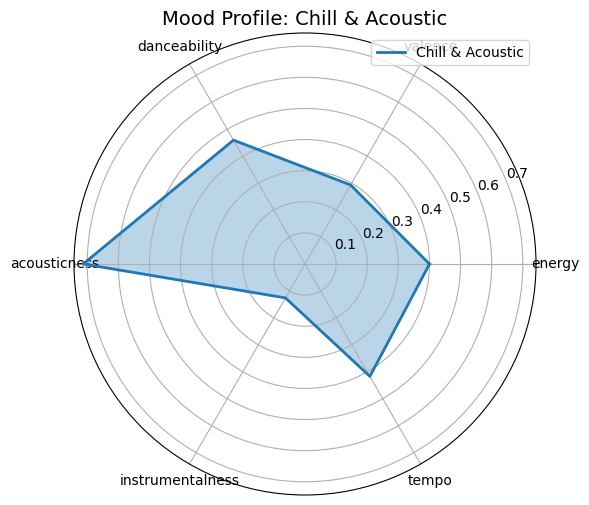

In [15]:
#making graphs for each mood profile
def plot_radar_for_cluster(cluster_row, cluster_index):
    labels = cluster_row.index.tolist()
    stats = cluster_row.values

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    angles += angles[:1]

    mood_label = cluster_labels.get(cluster_index, f"Cluster {cluster_index}")

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, stats, linewidth=2, label=mood_label)
    ax.fill(angles, stats, alpha=0.3)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    plt.title(f"Mood Profile: {mood_label}", fontsize=14)
    plt.legend()
    plt.show()

for i in range(cluster_summary.shape[0]):
    plot_radar_for_cluster(cluster_summary.iloc[i], cluster_index=i)

In [16]:
import plotly.express as px

df_scaled['song'] = df['track_name'] + " - " + df['track_artist']

fig = px.scatter(
    df_scaled,
    x='PCA1',
    y='PCA2',
    color='danceability',
    hover_name='song',
    title='Interactive Mood Clusters with Songs',
    width=900,
    height=600
)

fig.show()

In [17]:
from sklearn.cluster import KMeans

#cluster based on scaled features
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features]) 

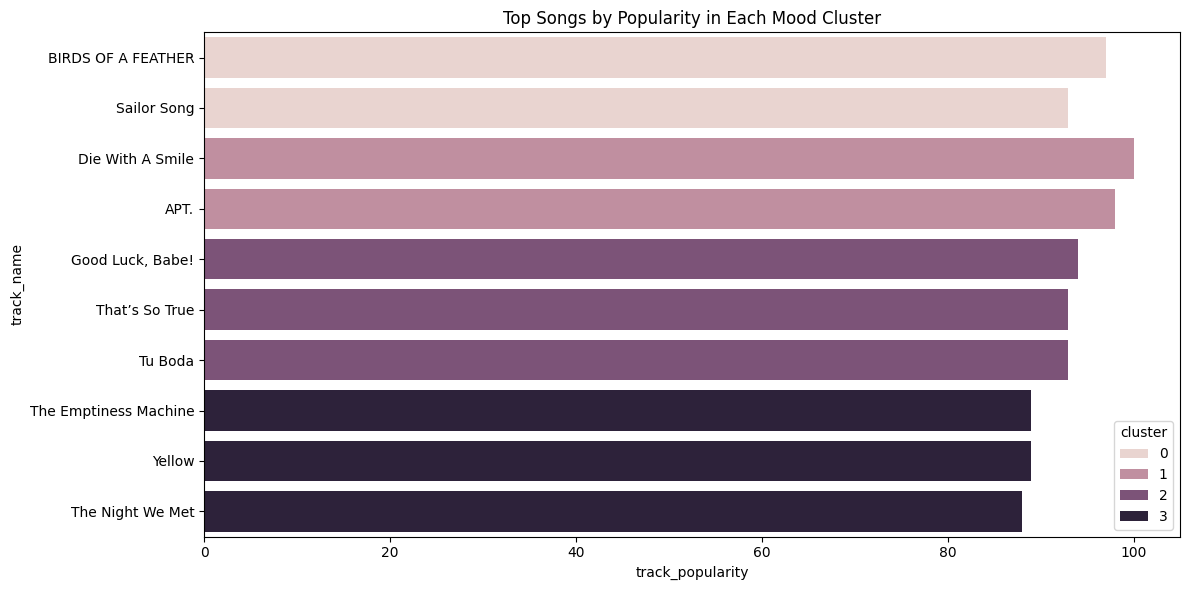

In [18]:
top_songs_idx = df.groupby('cluster')['track_popularity'].nlargest(5).index.get_level_values(1)
top_songs = df.loc[top_songs_idx]

plt.figure(figsize=(12, 6))
sns.barplot(x='track_popularity', y='track_name', hue='cluster', data=top_songs)
plt.title("Top Songs by Popularity in Each Mood Cluster")
plt.tight_layout()
plt.show()

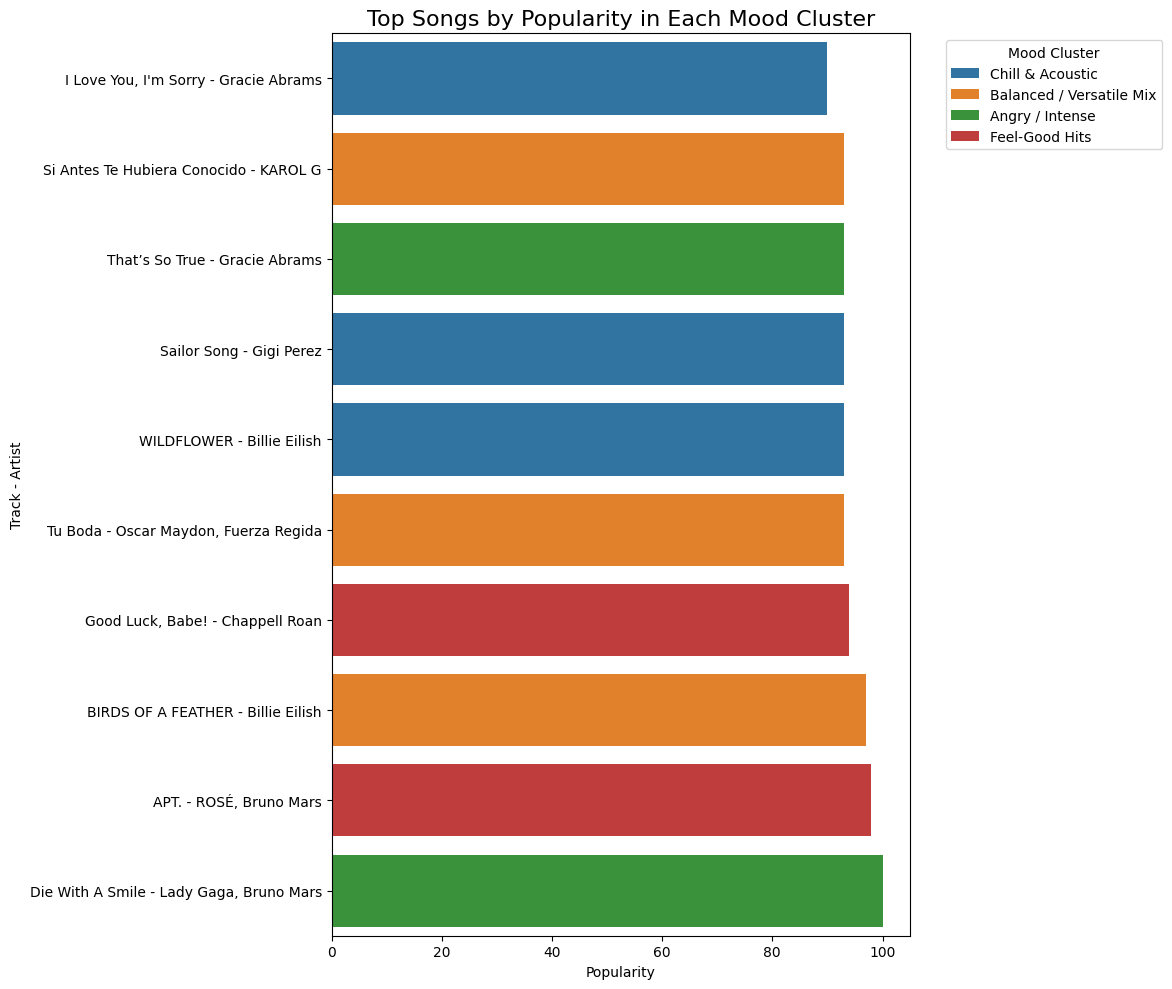

In [19]:
#plotting graph to get the top 5 
df['song_display'] = df['track_name'] + " - " + df['track_artist']

cluster_labels = {
    0: "Balanced / Versatile Mix",
    1: "Angry / Intense",
    2: "Feel-Good Hits",
    3: "Chill & Acoustic"
}

# Adding cluster label column
df['cluster_label'] = df_scaled['cluster'].map(cluster_labels)

#Top songs by popularity per cluster
top_songs_idx = df.groupby('cluster_label')['track_popularity'].nlargest(5).index.get_level_values(1)
top_songs = df.loc[top_songs_idx]

top_songs = top_songs.sort_values(by='track_popularity', ascending=True)

plt.figure(figsize=(12, 10))
sns.barplot(
    data=top_songs,
    x='track_popularity',
    y='song_display',
    hue='cluster_label',
    dodge=False,
    palette='tab10'
)

plt.title("Top Songs by Popularity in Each Mood Cluster", fontsize=16)
plt.xlabel("Popularity")
plt.ylabel("Track - Artist")
plt.legend(title="Mood Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
# # Create a column combining song + artist (for better labeling)
# df_full['song_display'] = df['track_name'] + " - " + df['track_artist']

# # Sort by acousticness and pick top 10 per mood cluster
# top10_acoustic = (
#     df_full.sort_values(by='acousticness', ascending=False)
#            .groupby('acousticness')
#            .head(10)
# )

In [21]:

features = ['energy', 'valence', 'danceability', 'acousticness', 'instrumentalness', 'tempo']


df_full = df[features + ['track_name', 'track_artist', 'track_popularity', 'cluster']].copy()

df_full['song_display'] = df_full['track_name'] + " - " + df_full['track_artist']

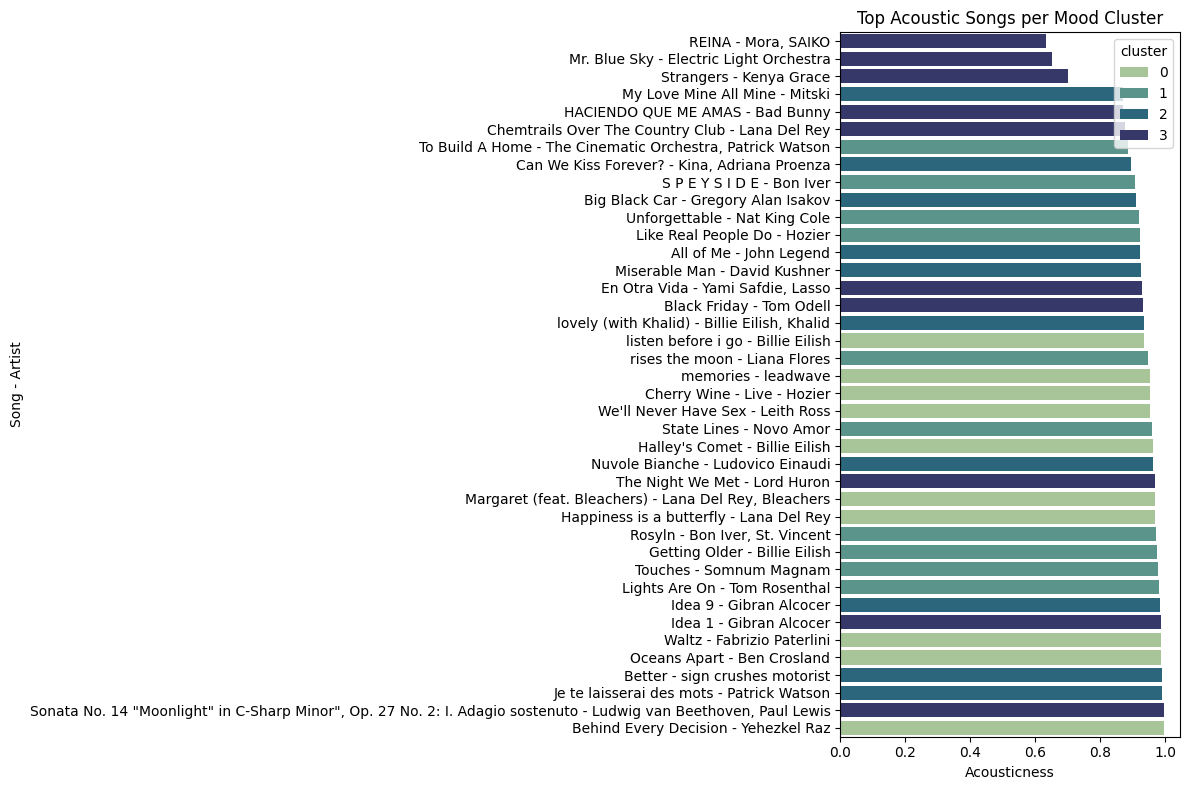

In [22]:
top10_acoustic = (
    df_full.sort_values(by='acousticness', ascending=False)
           .groupby('cluster')
           .head(10)
)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top10_acoustic.sort_values(by='acousticness', ascending=True),
    x='acousticness',
    y='song_display',
    hue='cluster',
    dodge=False,
    palette='crest'
)
plt.title("Top Acoustic Songs per Mood Cluster")
plt.xlabel("Acousticness")
plt.ylabel("Song - Artist")
plt.tight_layout()
plt.show()

/var/folders/0d/_4k861f50vz2n6hyf832vdkw0000gn/T/ipykernel_19043/2873691342.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




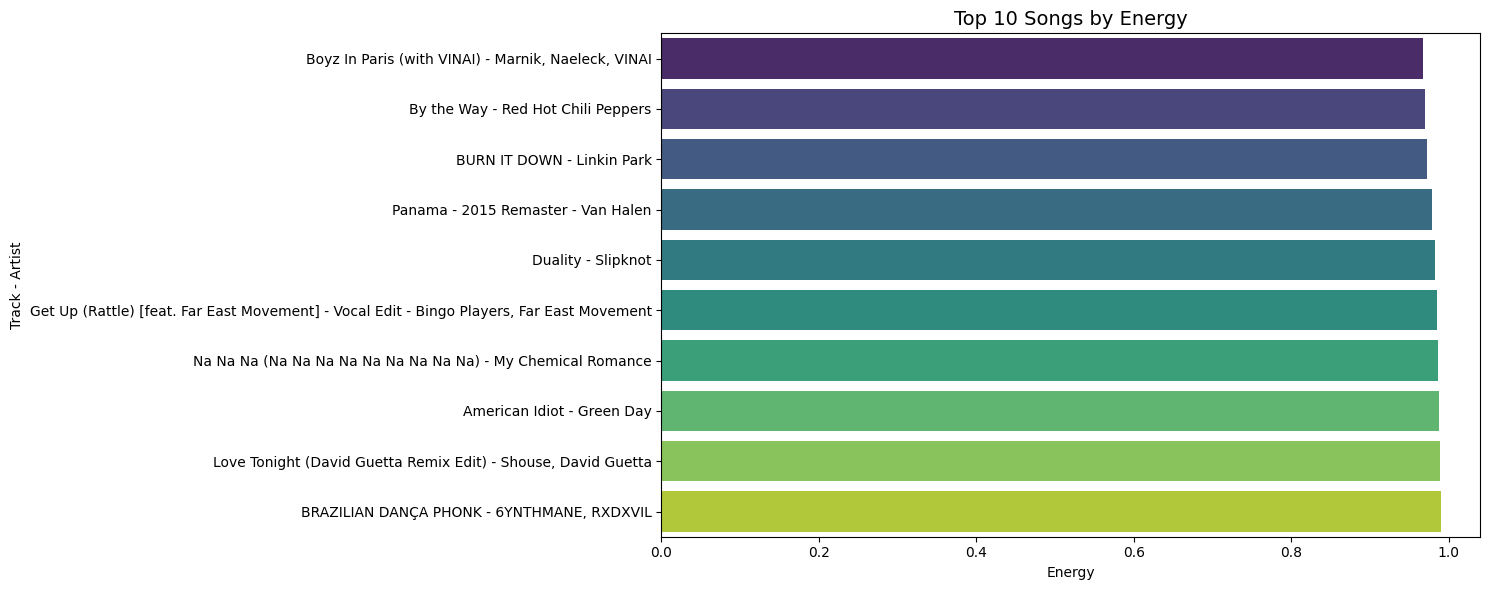

/var/folders/0d/_4k861f50vz2n6hyf832vdkw0000gn/T/ipykernel_19043/2873691342.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




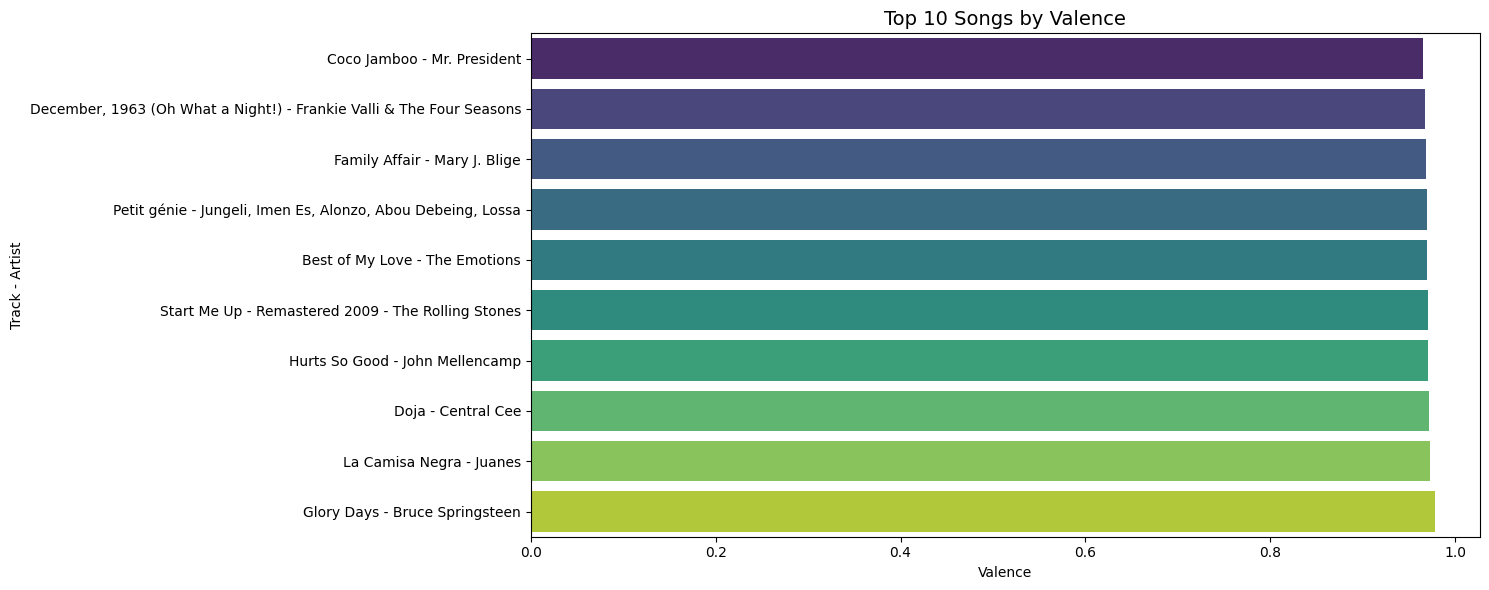

/var/folders/0d/_4k861f50vz2n6hyf832vdkw0000gn/T/ipykernel_19043/2873691342.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




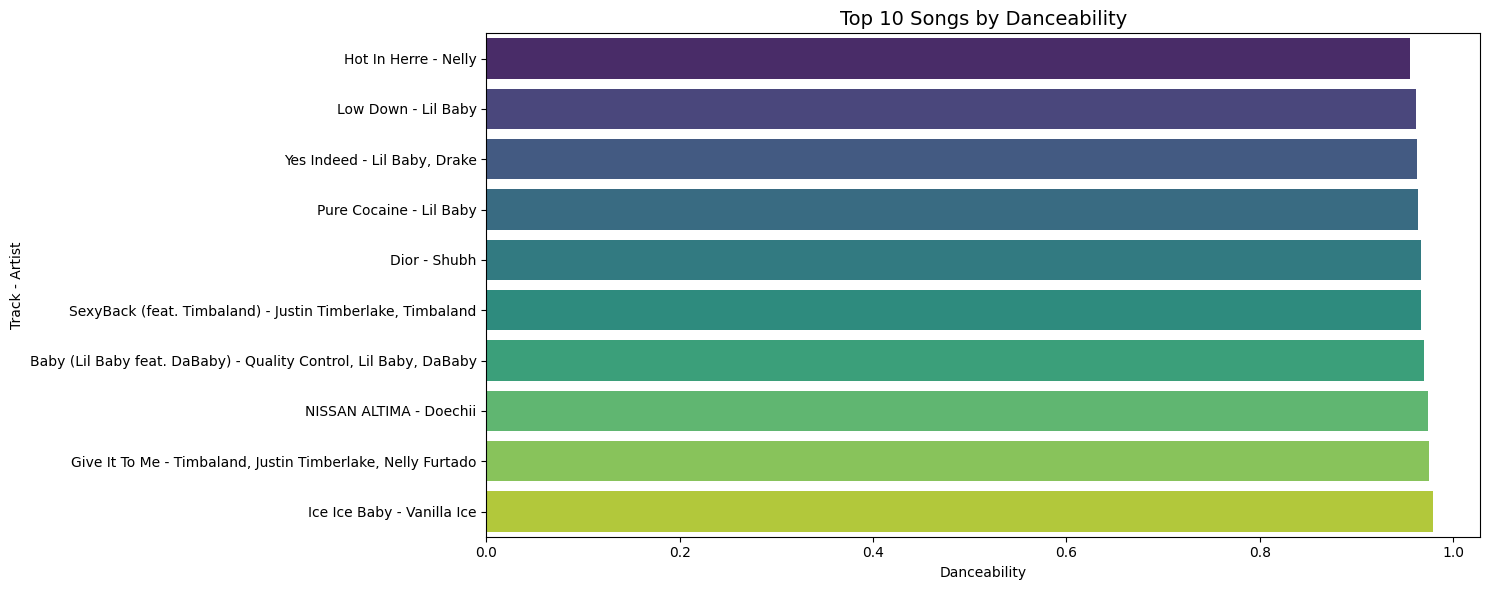

/var/folders/0d/_4k861f50vz2n6hyf832vdkw0000gn/T/ipykernel_19043/2873691342.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




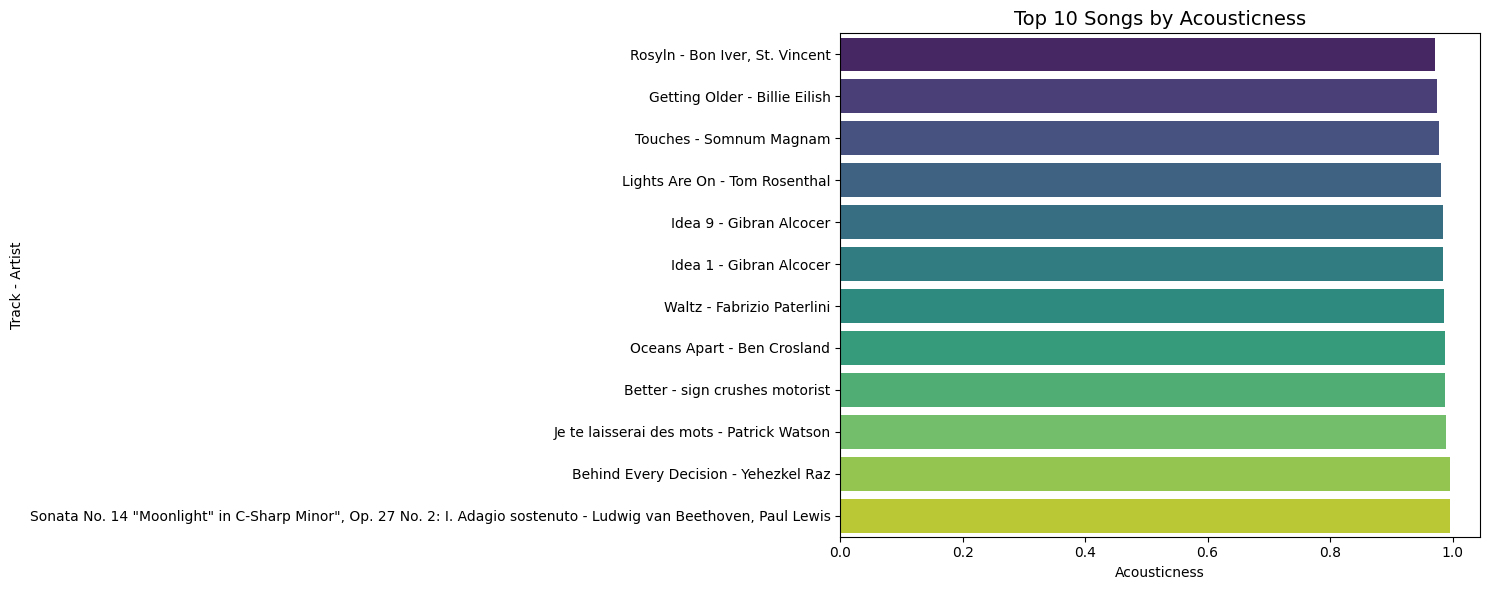

/var/folders/0d/_4k861f50vz2n6hyf832vdkw0000gn/T/ipykernel_19043/2873691342.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




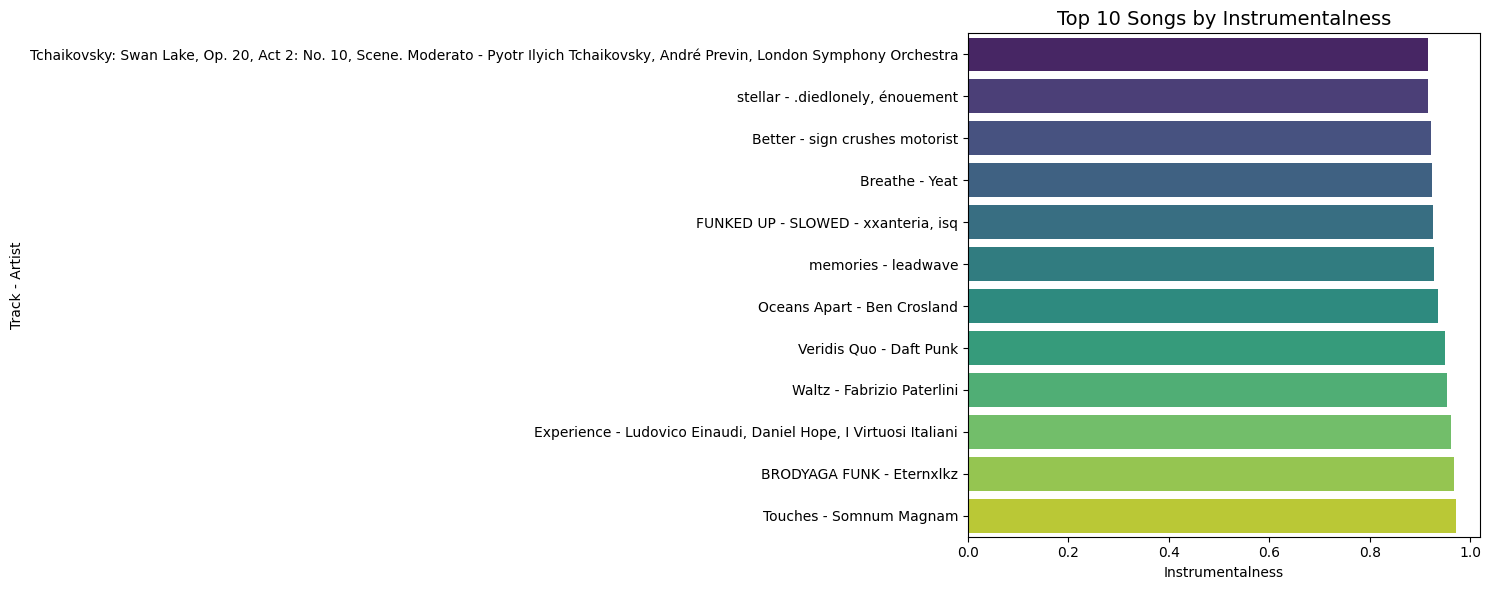

/var/folders/0d/_4k861f50vz2n6hyf832vdkw0000gn/T/ipykernel_19043/2873691342.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/0d/_4k861f50vz2n6hyf832vdkw0000gn/T/ipykernel_19043/2873691342.py:24: UserWarning:

Glyph 128081 (\N{CROWN}) missing from current font.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128081 (\N{CROWN}) missing from current font.



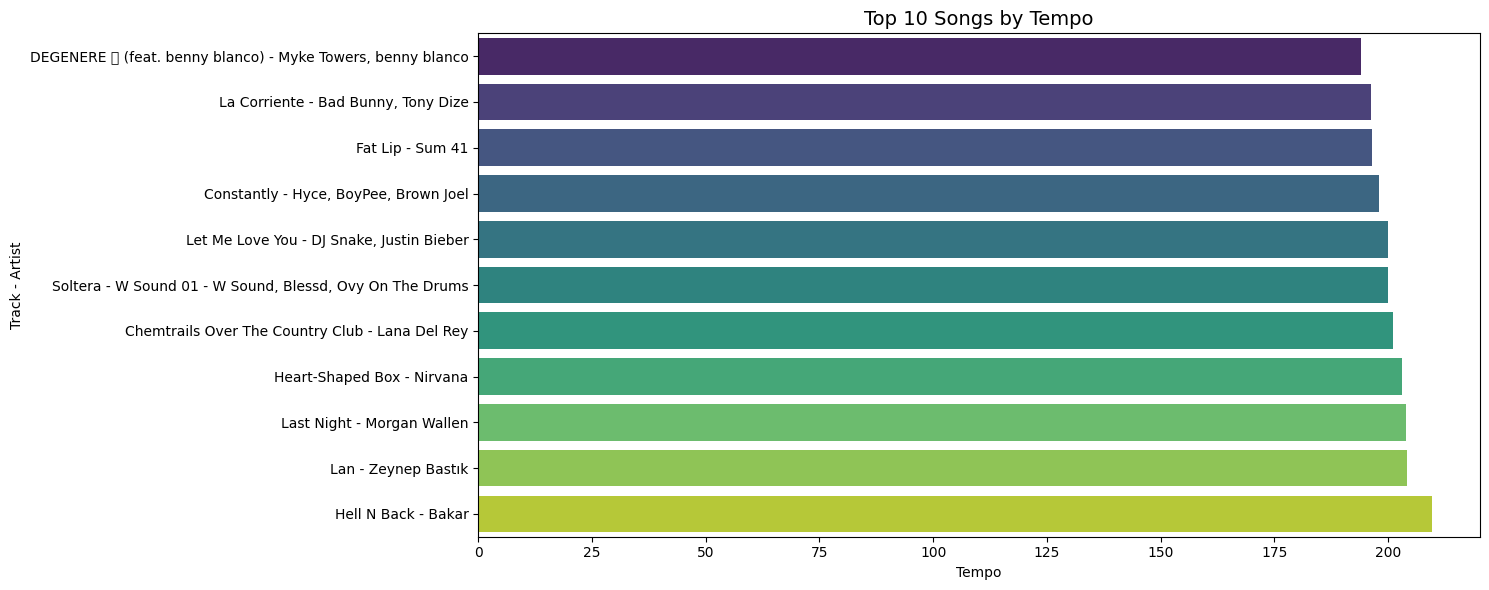

In [30]:
#making grpahs to display the top 10 songs from every feature
features = ['energy', 'valence', 'danceability', 'acousticness', 'instrumentalness', 'tempo']

#Build df_full with necessary columns
df_full = df[features + ['track_name', 'track_artist']].copy()

#Combine song + artist name for display
df_full['song_display'] = df_full['track_name'] + " - " + df_full['track_artist']

#Plot top 10 songs for each feature
for feature in features:
    top10 = df_full.sort_values(by=feature, ascending=False).head(12)

    plt.figure(figsize=(15, 6))
    sns.barplot(
        data=top10.sort_values(by=feature, ascending=True),
        x=feature,
        y='song_display',
        palette='viridis'
    )
    plt.title(f"Top 10 Songs by {feature.capitalize()}", fontsize=14)
    plt.xlabel(feature.capitalize())
    plt.ylabel("Track - Artist")
    plt.tight_layout()
    plt.show()

In [25]:
df_full = df[features + ['track_name', 'track_artist', 'track_popularity']].copy()

In [31]:
top20['song_display'] = top20['track_name'] + " - " + top20['track_artist']


NameError: name 'top20' is not defined

In [27]:
top20['song_display'] = top20['song_display'] + " (" + top20.index.astype(str) + ")"


NameError: name 'top20' is not defined

/var/folders/0d/_4k861f50vz2n6hyf832vdkw0000gn/T/ipykernel_14276/3192148265.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




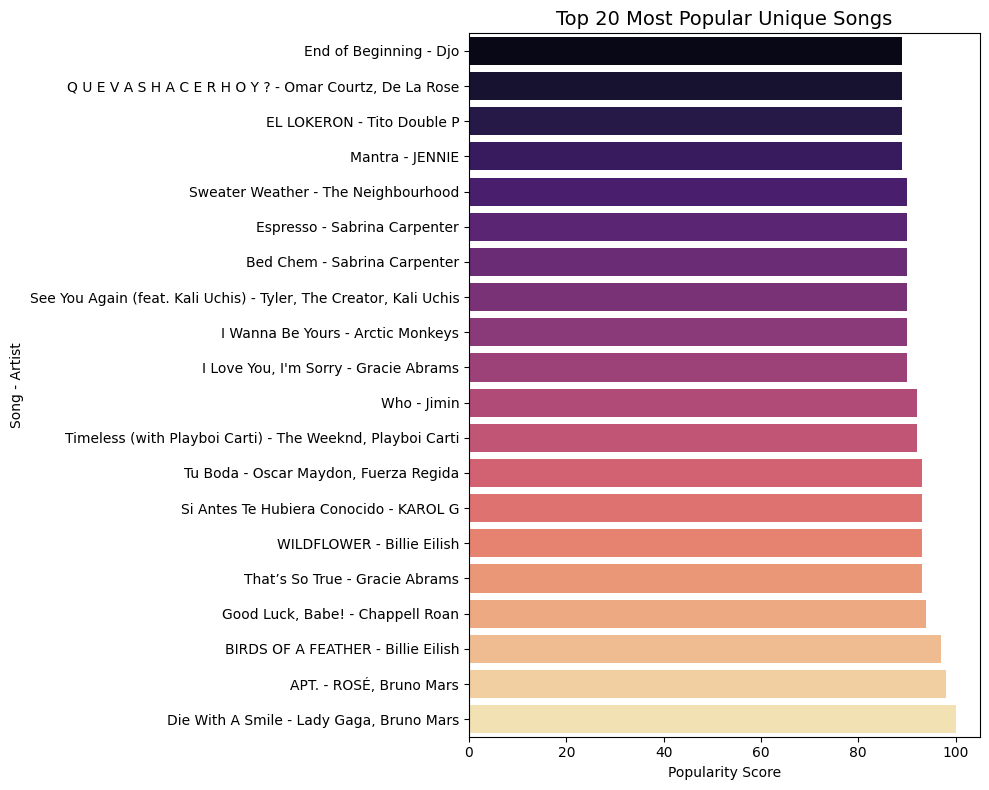

In [ ]:
#Generating the top 20 most popular songs 

#Create a unique identifier for each song
df_full['song_display'] = df_full['track_name'] + " - " + df_full['track_artist']

#Drop duplicates based on song display
df_unique = df_full.drop_duplicates(subset='song_display')

#Sort by popularity and pick top 20
top20 = df_unique.sort_values(by='track_popularity', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=top20.sort_values(by='track_popularity', ascending=True),  # plot low-to-high for horizontal layout
    x='track_popularity',
    y='song_display',
    palette='magma'
)
plt.title("Top 20 Most Popular Unique Songs", fontsize=14)
plt.xlabel("Popularity Score")
plt.ylabel("Song - Artist")
plt.tight_layout()
plt.show()


In [ ]:
top20 = df_full.sort_values(by='track_popularity', ascending=False).head(20).copy()
top20['song_display'] = top20['song_display'] + " (" + top20.index.astype(str) + ")"

/var/folders/0d/_4k861f50vz2n6hyf832vdkw0000gn/T/ipykernel_8646/2969479377.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




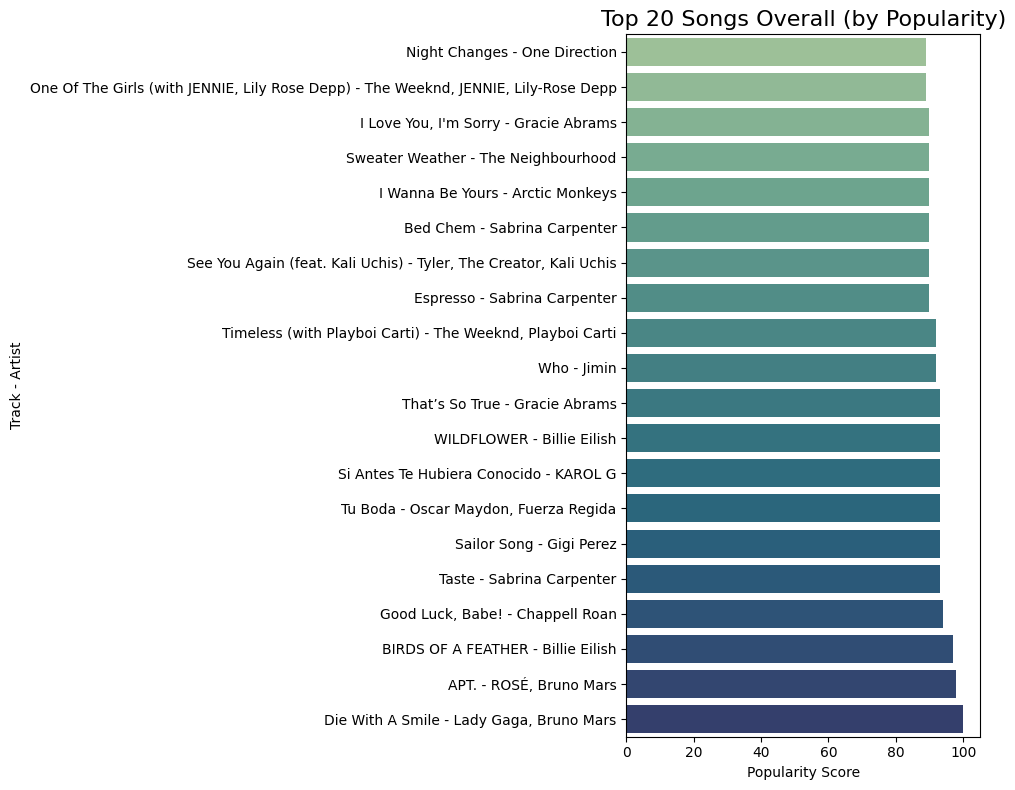

In [ ]:
# # Add song label if not already done
# df_full['song_display'] = df['track_name'] + " - " + df['track_artist']

# # Sort by popularity and take top 20
# top20 = df_full.sort_values(by='track_popularity', ascending=False).head(43)

# # Plot
# plt.figure(figsize=(10, 8))
# sns.barplot(
#     data=top20.sort_values('track_popularity', ascending=True),  # Flip for better visuals
#     x='track_popularity',
#     y='song_display',
#     palette='crest'
# )

# plt.title("Top 20 Songs Overall (by Popularity)", fontsize=16)
# plt.xlabel("Popularity Score")
# plt.ylabel("Track - Artist")
# plt.tight_layout()
# plt.show()

In [ ]:
print(df_full.columns.tolist())

['energy', 'valence', 'danceability', 'acousticness', 'instrumentalness', 'tempo', 'track_name', 'track_artist', 'song_display']


In [ ]:

df['cluster_label'] = df_scaled['cluster'].map(cluster_labels)

#create a song ID column for unique export
df['song_display'] = df['track_name'] + " - " + df['track_artist']

In [ ]:
import re

safe_mood = re.sub(r'[^a-zA-Z0-9_-]', '', mood.strip().lower()) or "unknown"
filename = f"playlist_{safe_mood}.csv"

In [ ]:
df['song_display'] = df['track_name'] + " - " + df['track_artist']

#Export playlist for each mood cluster
for mood in df['cluster_label'].unique():
    
    #Clean filename (remove special characters and lowercase)
    filename = f"playlist_{mood.replace(' ', '_').replace('/', '').replace('&', 'and').lower()}.csv"
    
    #Filter columns for output
    playlist_df = df[df['cluster_label'] == mood][[
        'track_name', 'track_artist', 'track_album_name', 'track_href', 'uri'
    ]]
    
    #Export CSV
    playlist_df.to_csv(filename, index=False)
    print(f"✅ Exported: {filename}")

✅ Exported: playlist_angry__intense.csv
✅ Exported: playlist_balanced__versatile_mix.csv
✅ Exported: playlist_feel-good_hits.csv
✅ Exported: playlist_chill_and_acoustic.csv


In [ ]:
pip install streamlit


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [ ]:
df_full.head()

,energy,valence,danceability,acousticness,instrumentalness,tempo,track_name,track_artist,track_popularity,song_display
0,0.592,0.535,0.521,0.3080,0.0000,157.969,Die With A Smile,"Lady Gaga, Bruno Mars",100,"Die With A Smile - Lady Gaga, Bruno Mars"
1,0.507,0.438,0.747,0.2000,0.0608,104.978,BIRDS OF A FEATHER,Billie Eilish,97,BIRDS OF A FEATHER - Billie Eilish
2,0.808,0.372,0.554,0.2140,0.0000,108.548,That’s So True,Gracie Abrams,93,That’s So True - Gracie Abrams
3,0.910,0.786,0.670,0.0939,0.0000,112.966,Taste,Sabrina Carpenter,81,Taste - Sabrina Carpenter
4,0.783,0.939,0.777,0.0283,0.0000,149.027,APT.,"ROSÉ, Bruno Mars",98,"APT. - ROSÉ, Bruno Mars"


In [ ]:
print(df.columns)


Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id', 'cluster', 'song_display', 'cluster_label'],
      dtype='object')


In [ ]:
df = pd.read_csv('spotify_data1.csv')
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [ ]:
print(df_scaled.columns)

Index(['energy', 'valence', 'danceability', 'acousticness', 'instrumentalness',
       'tempo', 'cluster', 'track_name', 'PCA1', 'PCA2', 'cluster_label',
       'song'],
      dtype='object')


In [ ]:
print(df.columns.tolist())

['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness', 'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness', 'track_popularity', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'instrumentalness', 'track_album_id', 'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre', 'type', 'playlist_id']


In [ ]:
#creating a separate csv to save the final processed data
metadata_cols = [
    'track_name', 'track_artist', 'track_album_name',
    'track_popularity', 'energy', 'valence', 'danceability',
    'acousticness', 'instrumentalness', 'tempo',
    'track_href', 'uri'
]

df_metadata = df.loc[df_scaled.index, metadata_cols].copy()

df_metadata['cluster_label'] = df_scaled['cluster_label'].values

df_clean = df_metadata

df_clean.to_csv("spotify_cluster_data.csv", index=False)
print("✅ Saved: spotify_cluster_data.csv")

✅ Saved: spotify_cluster_data.csv


2025-05-31 19:26:27.762 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 19:26:27.763 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 19:26:27.764 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 19:26:27.766 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 19:26:27.767 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-05-31 19:26:27.768 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

DeltaGenerator()

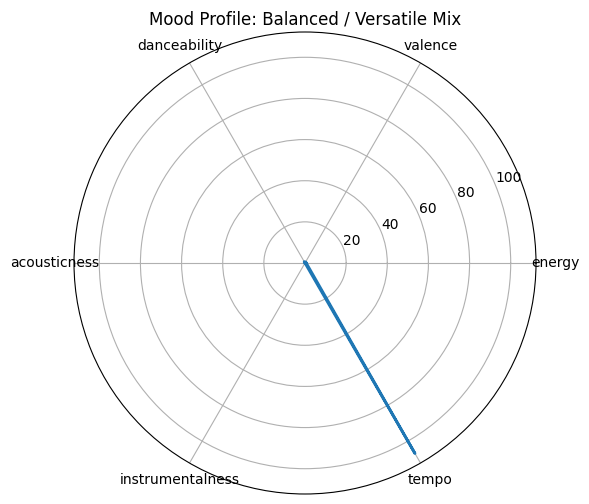

In [28]:
import streamlit as st

df = pd.read_csv("spotify_cluster_data.csv")

#Sidebar mood selector
moods = df['cluster_label'].unique().tolist()
selected_mood = st.sidebar.selectbox("Select a Mood", sorted(moods))

#Filter by selecting mood
mood_df = df[df['cluster_label'] == selected_mood]

#Show song title
st.title(f"🎵 Playlist: {selected_mood}")
st.write(f"Total songs: {len(mood_df)}")

# Show playlist
st.dataframe(mood_df[['track_name', 'track_artist', 'track_album_name', 'track_href']])

# Download playlist
csv = mood_df.to_csv(index=False).encode('utf-8')
st.download_button(f"📥 Download '{selected_mood}' Playlist", csv, file_name=f"{selected_mood}.csv", mime='text/csv')

# Radar chart of mood features
features = ['energy', 'valence', 'danceability', 'acousticness', 'instrumentalness', 'tempo']
cluster_mean = mood_df[features].mean()

angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
stats = cluster_mean.tolist()
stats += stats[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, stats, linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), features)
plt.title(f"Mood Profile: {selected_mood}")
st.pyplot(fig)